In [1]:
from scipy import *
from numpy import *
from matplotlib.pyplot import *
from scipy.linalg import *
from numpy.linalg import *
from scipy.integrate import solve_ivp
import FNC

In [2]:
# This (optional) block is for improving the display of plots.
from IPython.display import set_matplotlib_formats
set_matplotlib_formats("svg","pdf")
rcParams["figure.figsize"] = [7,4]
rcParams["lines.linewidth"] = 2
rcParams["lines.markersize"] = 4
rcParams['animation.html'] = "jshtml"  # or try "html5"

# Example 6.1.2

The equation $u'=\sin[(u+t)^2]$ also has a solution that can be found numerically with ease, even though no formula exists for its solution. 

In [3]:
f = lambda t,u: sin((t+u)**2);
tspan = [0.0,4.0];
u0 = [-1.0];

The `solve_ivp` function from `scipy.integrate` package offers solvers for a variety of initial-value problems. Note that even though this is a problem for a scalar function $u(t)$, we had to set the initial condition as a "one-dimensional vector."

In [4]:
sol = solve_ivp(f,tspan,u0)
print("t shape:",sol.t.shape)
print("u shape:",sol.y.shape)

t shape: (10,)
u shape: (1, 10)


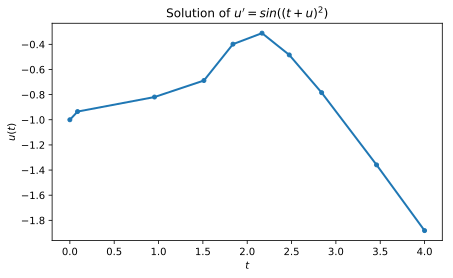

In [5]:
plot(sol.t,sol.y[0,:],"-o")
xlabel("$t$"); ylabel("$u(t)$");
title("Solution of $u'=sin((t+u)^2)$");

You can see above that the solution was not computed at enough points to make a smooth graph. There is a way to request output at times of your choosing.

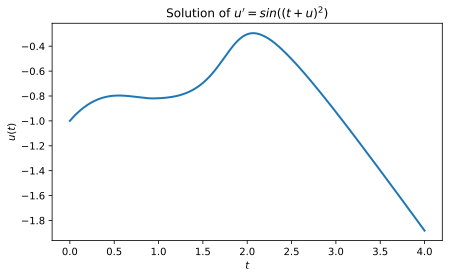

In [6]:
sol = solve_ivp(f,tspan,u0,t_eval=linspace(0,4,200))
plot(sol.t,sol.y[0,:],"-")
xlabel("$t$"); ylabel("$u(t)$");
title("Solution of $u'=sin((t+u)^2)$");

# Example 6.1.3

We return to the equation $u'=\sin[(u+t)^2]$ to inspect the output a bit more closely. With a different calling sequence, we get a different form of the solution.

In [7]:
f = lambda t,u:  sin((t+u)**2);
tspan = [0.0,4.0]
u0 = [-1.0]
sol = solve_ivp(f,tspan,u0,dense_output=True)
print(sol)

  message: 'The solver successfully reached the end of the integration interval.'
     nfev: 74
     njev: 0
      nlu: 0
      sol: <scipy.integrate._ivp.common.OdeSolution object at 0x117d32f98>
   status: 0
  success: True
        t: array([0.        , 0.08678069, 0.95458764, 1.51184457, 1.83932625,
       2.16680793, 2.47420055, 2.83939376, 3.45870512, 4.        ])
 t_events: None
        y: array([[-1.        , -0.93483006, -0.81915309, -0.68787148, -0.39850471,
        -0.31098173, -0.48416164, -0.78438391, -1.35899143, -1.88183955]])


The `t` and `y` fields are as before. But there is another field that can be called like any other function of $t$.

In [8]:
print(sol.sol([0,1,2,3,4]))

[[-1.         -0.81800019 -0.30391667 -0.92856031 -1.88183955]]


As you might guess, the solution object performs some interpolation on some discrete solution values This chapter is about how the discrete $t$ and $u$ values are computed. 

# Example 6.1.5

The equation $u'=(u+t)^2$ gives us some trouble.

In [9]:
f = lambda t,u:  (t+u)**2
sol = solve_ivp(f,[0.,1.],[1.0])

We requested the solution for $0\le t \le 1$, but the integration did not complete that job.

In [10]:
if not sol.success: print(sol.message)

Required step size is less than spacing between numbers.


A plot shows that the solution appears to have blown up along a vertical asymptote. This can happen in nonlinear ODEs.

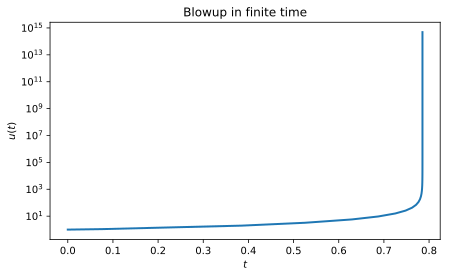

In [11]:
semilogy(sol.t,sol.y[0,:])
xlabel("$t$"); ylabel("$u(t)$");
title("Blowup in finite time");

# Example 6.1.6

Consider the ODEs $u'=u$ and $u'=-u$. In each case we compute $\partial f/\partial u = \pm 1$, so the condition number bound is $e^{(b-a)}$ in both problems. However, they behave quite differently. In the case of exponential growth, $u'=u$, the bound is the actual condition number.

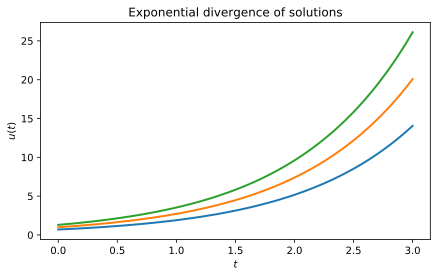

In [12]:
t = linspace(0,3,200)
u = array([ exp(t)*u0 for u0 in [0.7,1,1.3] ])
plot(t,u.T)
xlabel("$t$"); ylabel("$u(t)$");
title("Exponential divergence of solutions");

But with $u'=-u$, solutions actually get closer together with time.

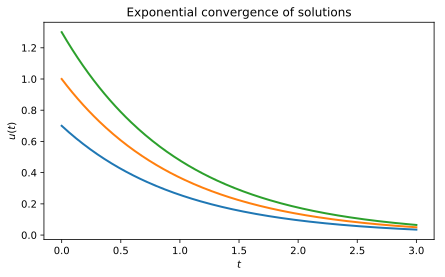

In [13]:
t = linspace(0,3,200)
u = array([ exp(-t)*u0 for u0 in [0.7,1,1.3] ])
plot(t,u.T)
xlabel("$t$"); ylabel("$u(t)$");
title("Exponential convergence of solutions");

In this case the actual condition number is one, due to the difference of solutions at the initial time. 

# Example 6.2.1

We consider the IVP $u'=\sin[(u+t)^2]$ over $0\le t \le 4$, with $u(0)=-1$. 

In [14]:
f = lambda t,u: sin((t+u)**2)
tspan = [0.0,4.0]
u0 = -1.0

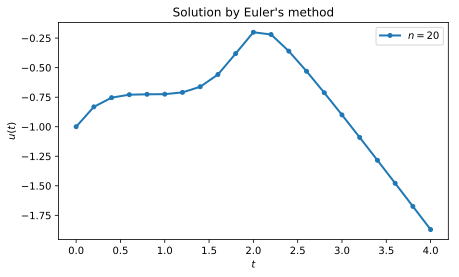

In [15]:
t,u = FNC.eulerivp(f,tspan,u0,20)
fig,ax = subplots()
ax.plot(t,u,"-o",label="$n=20$")
xlabel("$t$"); ylabel("$u(t)$"); 
title("Solution by Euler's method");
legend();

We could define a different interpolant to get a smoother picture above, but the derivation assumed the piecewise linear interpolant, so it is the most meaningful one. We can instead request more steps to make the interpolant look smoother.

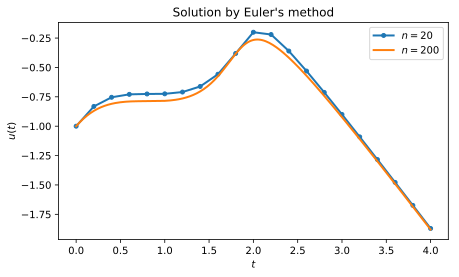

In [16]:
t,u = FNC.eulerivp(f,tspan,u0,200)
ax.plot(t,u,label="$n=200$")
ax.legend(); fig

Increasing $n$ changed the solution noticeably. Since we know that interpolants and finite differences become more accurate as $h\to 0$, we should expect that from Euler's method too.

We don't have an exact solution to compare to, so we will use `solve_ivp` to construct an accurate solution. 

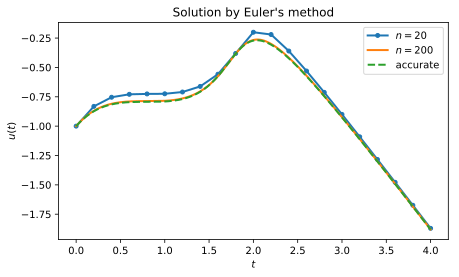

In [17]:
sol = solve_ivp(f,tspan,[u0],dense_output=True,atol=1e-8,rtol=1e-8)
ax.plot(t,sol.sol(t)[0],"--",label="accurate")
ax.legend(); fig

Now we can perform a convergence study. 

In [18]:
N = 50*2**arange(6)
err = zeros(6)
for (j,n) in enumerate(N):
    t,u = FNC.eulerivp(f,tspan,u0,n)
    err[j] = max( abs(sol.sol(t)[0]-u) )
    print(f"{n:5d}  {err[j]:9.3e}")

   50  3.000e-02
  100  1.423e-02
  200  6.944e-03
  400  3.430e-03
  800  1.704e-03
 1600  8.495e-04


The error is almost perfectly halved at each step, so we expect that a log-log plot will reveal first-order convergence.

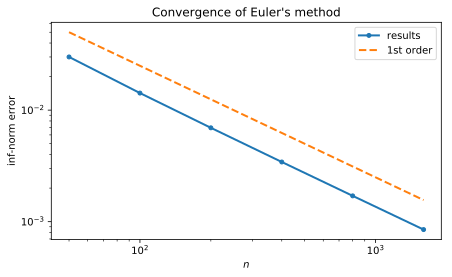

In [19]:
loglog(N,err,"-o",label="results")
plot(N,0.05*(N/N[0])**(-1),"--",label="1st order")
xlabel("$n$"); ylabel("inf-norm error");
legend(); title("Convergence of Euler's method");

# Example 6.3.2

In [20]:
A = array([ [-2,5], [-1,0] ])

In [21]:
u0 = [1,0]
t = linspace(0,6,600)     # times for plotting
u = zeros([2,600])
for j in range(600):
    ut = dot(expm(t[j]*A),u0)
    u[:,j] = ut

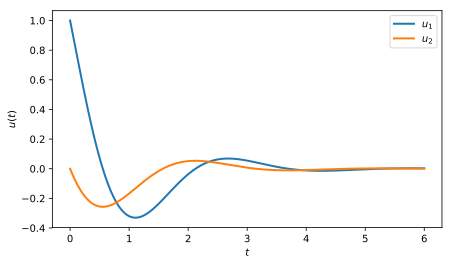

In [22]:
plot(t,u[0,:],label="$u_1$")
plot(t,u[1,:],label="$u_2$")
xlabel("$t$"); ylabel("$u(t)$");
legend();

# Example 6.3.3

We encode the predator–prey equations via a function. 

In [23]:
def predprey(t,u):
    y,z = u;                   # rename for convenience
    s = (y*z) / (1+beta*y)     # appears in both equations
    return array([ y*(1-alpha*y) - s,  -z + s ])

Note that the function accepts four inputs. In order to use it, we also have to assign values to `alpha` and `beta`.

To solve the IVP we must also provide the initial condition, which is a 2-vector here, and the interval for the independent variable.

In [24]:
u0 = [1,0.01]
tspan = [0.,80.]
alpha = 0.1;  beta = 0.25;
sol = solve_ivp(predprey,tspan,u0,dense_output=True);

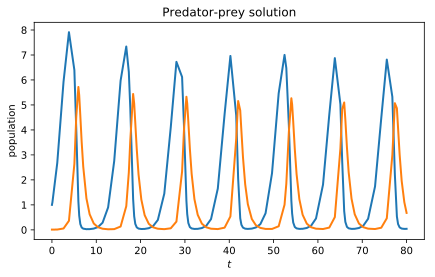

In [25]:
plot(sol.t,sol.y[0,:],label="prey")
plot(sol.t,sol.y[1,:],label="predator")
xlabel("$t$"); ylabel("population");
title("Predator-prey solution");

The plot above lacks smoothness because it uses just the discrete values, without interpolating between them. 

When there are just two components, it's common to plot the solution in the _phase plane_, i.e., with $u_1$ and $u_2$ along the axes and time as a parameterization of the curve.

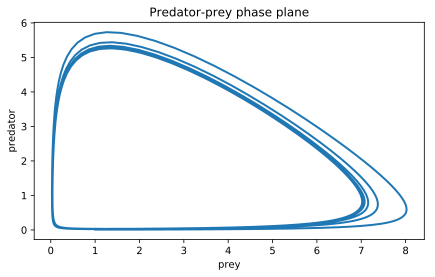

In [26]:
t = linspace(0,80,1200)
u = sol.sol(t)
plot(u[0,:],u[1,:])
xlabel("prey"); ylabel("predator");
title("Predator-prey phase plane");

From this plot we can deduce that the solution approaches a periodic one, which in the phase plane is reprepresented by a closed loop. 

# Example 6.4.1

We consider the IVP $u'=\sin[(u+t)^2]$ over $0\le t \le 4$, with $u(0)=-1$. 

In [27]:
f = lambda t,u: sin((t+u)**2)
tspan = [0.0,4.0]
u0 = array([-1.0])

We use `solve_ivp` to construct an accurate approximation to the exact solution.

In [28]:
u_exact = solve_ivp(f,tspan,u0,dense_output=True,rtol=1e-13,atol=1e-13)

Now we perform a convergence study of our two Runge--Kutta implementations.

In [29]:
n = 50*2**arange(6)
err_IE2 = zeros(6)
err_RK4 = zeros(6)
for j in range(6):
    t,u = FNC.ie2(f,tspan,u0,n[j])
    err_IE2[j] = max( abs(u_exact.sol(t)-u)[0] )
    t,u = FNC.rk4(f,tspan,u0,n[j])
    err_RK4[j] = max( abs(u_exact.sol(t)-u)[0] )

The amount of computational work at each time step is assumed to be proportional to the number of stages. Let's compare on an apples-to-apples basis by using the number of $f$-evaluations on the horizontal axis.

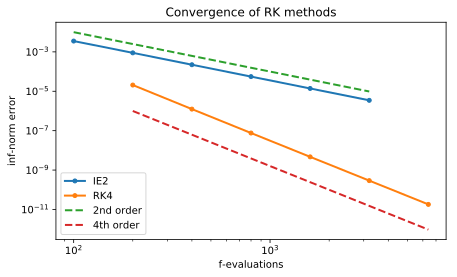

In [30]:
loglog(2*n,err_IE2,"-o",label="IE2") 
loglog(4*n,err_RK4,"-o",label="RK4") 
plot(2*n,0.01*(n/n[0])**(-2),"--",label="2nd order")
plot(4*n,1e-6*(n/n[0])**(-4),"--",label="4th order")

xlabel("f-evaluations"); ylabel("inf-norm error");
legend(); title("Convergence of RK methods");

The fourth-order variant is more efficient in this problem over a wide range of accuracy.

# Example 6.5.1

Let's run adaptive RK on  $u'=e^{t-u\sin u}$. 

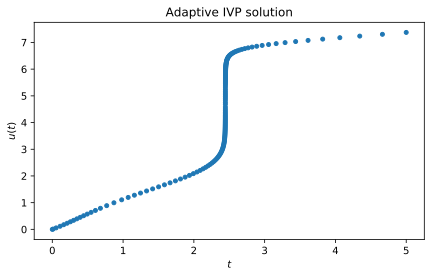

In [31]:
f = lambda t,u: exp(t-u*sin(u))
t,u = FNC.rk23(f,[0.,5.],array([0.0]),1e-5)
scatter(t,u)
xlabel("$t$"); ylabel("$u(t)$"); 
title("Adaptive IVP solution");

The solution makes a very abrupt change near $t=2.4$. The resulting time steps vary over three orders of magnitude.

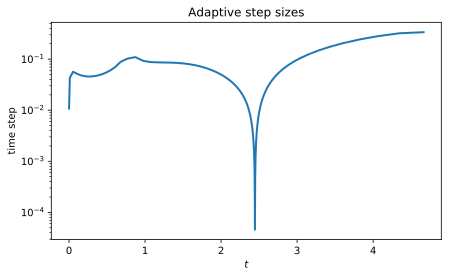

In [32]:
dt = [t[i+1] - t[i] for i in range(t.size-1)]
semilogy(t[:-1],dt)
xlabel("$t$"); ylabel("time step"); 
title("Adaptive step sizes");

If we had to run with a uniform step size to get this accuracy, it would be

In [33]:
print("min step:",min(dt))

min step: 4.6096854609878335e-05


On the other hand, the average step size that was actually taken was

In [34]:
print("average step:",mean(dt))

average step: 0.03205128205128205


We took fewer steps by a factor of almost 1000! Even accounting for the extra stage per step and the occasional rejected step, the savings are clear.

# Example 6.5.2

In [35]:
f = lambda t,u: (t+u)**2
t,u = FNC.rk23(f,[0,1],array([1.0]),1e-5)

/Users/driscoll/Dropbox/books/fnc-extras/python/FNC06.py:116: UserWarning: Stepsize too small near t=0.785408720407281
  warnings.warn(f"Stepsize too small near t={t[i]}")


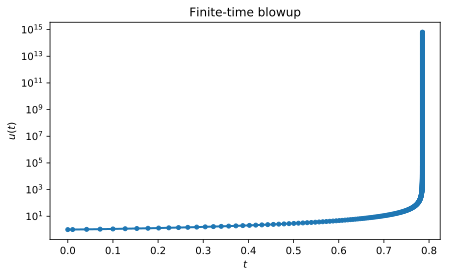

In [36]:
semilogy(t,u[0],"-o")
xlabel("$t$"); ylabel("$u(t)$");
title("Finite-time blowup");

# Example 6.7.1

We consider the IVP $u'=\sin[(u+t)^2]$ over $0\le t \le 4$, with $u(0)=-1$. 

In [37]:
f = lambda t,u: sin((t+u)**2)
tspan = [0.0,4.0]
u0 = array([-1.0])

We use a `solve_ivp` to construct an accurate approximation to the exact solution.

In [38]:
u_exact = solve_ivp(f,tspan,u0,dense_output=True,rtol=1e-13,atol=1e-13)

Now we perform a convergence study of the AB4 code. 

In [39]:
n = 10*2**arange(6)
err = zeros(6)
for j in range(6):
    t,u = FNC.ab4(f,tspan,u0,n[j])
    err[j] = max( abs(u_exact.sol(t)-u)[0] )

The method should converge as $O(h^4)$, so a log-log scale is appropriate for the errors. 

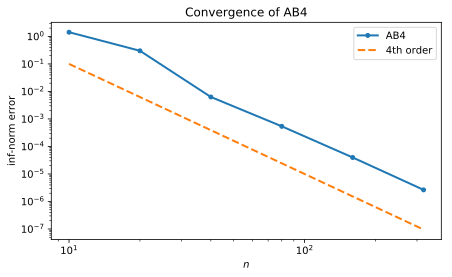

In [40]:
loglog(n,err,"-o",label="AB4")
loglog(n,0.1*(n/n[0])**(-4),"--",label="4th order")

xlabel("$n$");   ylabel("inf-norm error");
legend(); title("Convergence of AB4");

# Example 6.7.2

The following simple ODE uncovers a surprise. 

In [41]:
f = lambda t,u: u**2 - u**3
u0 = array([0.005])

We will solve the problem first with the implicit AM2 method using $n=200$ steps.

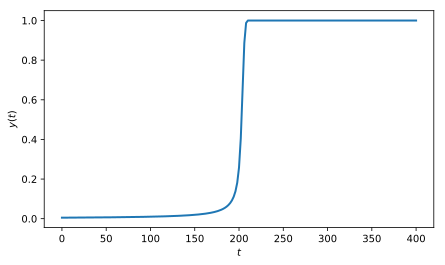

In [42]:
tI,uI = FNC.am2(f,[0.,400.],u0,200);
fig,ax = subplots()
ax.plot(tI,uI[0],label="AM2")
xlabel("$t$"); ylabel("$y(t)$");

Now we repeat the process using the explicit AB4 method.

/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: RuntimeWarning: overflow encountered in square
  """Entry point for launching an IPython kernel.
/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: RuntimeWarning: overflow encountered in power
  """Entry point for launching an IPython kernel.
/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: RuntimeWarning: invalid value encountered in subtract
  """Entry point for launching an IPython kernel.


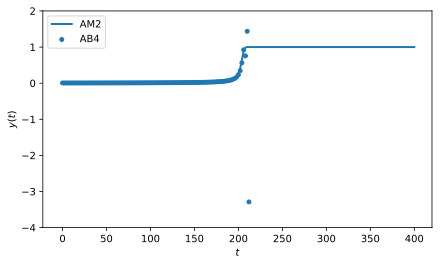

In [43]:
tE,uE = FNC.ab4(f,[0.,400.],u0,200);
ax.scatter(tE,uE[0],label="AB4")
ax.set_ylim([-4,2]);
ax.legend();  fig

Once the solution starts to take off, the AB4 result goes catastrophically wrong.

In [44]:
uE[0,104:111]

array([ 7.55385780e-01,  1.43729703e+00, -3.28897685e+00,  2.14179113e+02,
       -4.48208915e+07,  4.12689029e+23, -3.22144124e+71])

We hope that AB4 will converge in the limit $h\to 0$, so let's try using more steps.

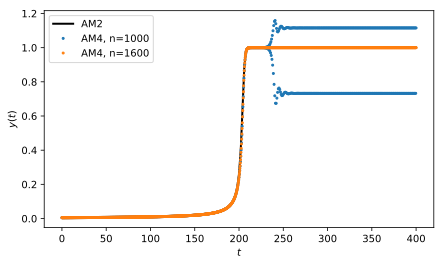

In [45]:
plot(tI,uI[0],color="k",label="AM2")
tE,uE = FNC.ab4(f,[0,400],u0,1000);
plot(tE,uE[0],".",label="AM4, n=1000")
tE,uE = FNC.ab4(f,[0,400],u0,1600);
plot(tE,uE[0],".",label="AM4, n=1600")
xlabel("$t$"); ylabel("$y(t)$")
legend();

So AB4, which is supposed to be _more_ accurate than AM2, actually needs something like 8 times as many steps to get a reasonable-looking answer!

# Example 6.8.1

Consider the ridiculously simple IVP $u'=u$, $u(0)=1$, whose solution is $e^t$. 

In [46]:
dudt = lambda t,u: u
u_exact = exp
a = 0.0;  b = 1.0;

Let's apply the LIAF method to this problem for varying fixed step sizes. We'll measure the error at the time $t=1$. 

In [47]:
n = [5,10,20,40,60]
err = zeros(5)
print("   n      h       error")
for j in range(5):
    h = (b-a)/n[j]
    t = [ a + i*h for i in range(n[j]+1) ]
    u = zeros(n[j]+1)
    u[:2] = u_exact(t[:2])
    f = zeros(n[j]+1)
    f[0] = dudt(t[0],u[0])
    for i in range(1,n[j]):
        f[i] = dudt(t[i],u[i])
        u[i+1] = -4*u[i] + 5*u[i-1] + h*(4*f[i]+2*f[i-1])
    err = abs(u_exact(b) - u[-1])
    print(f"{n[j]:4d} {(b-a)/n[j]:8.4f}  {err:9.2e}")   

   n      h       error
   5   0.2000   1.60e-02
  10   0.1000   2.85e+00
  20   0.0500   1.62e+06
  40   0.0250   9.34e+18
  60   0.0167   1.74e+32


The error starts out promisingly, but things explode from there. A graph of the last numerical attempt yields a clue.

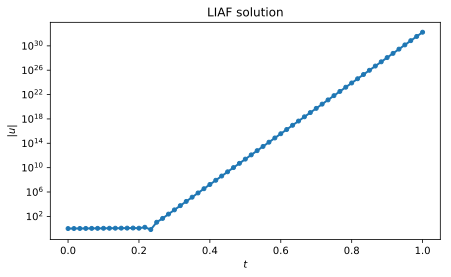

In [48]:
semilogy(t,abs(u),"-o")
xlabel("$t$"); ylabel("$|u|$"); 
title("LIAF solution");

It's clear that the solution is growing exponentially in time.